In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sp-500-stock-prices/SP 500 Stock Prices 2014-2017.csv


In [2]:
import warnings; warnings.simplefilter('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from tqdm import tqdm

In [3]:
stocks = pd.read_csv('../input/sp-500-stock-prices/SP 500 Stock Prices 2014-2017.csv')
stocks.shape

(497472, 7)

### Check Volumes and Dollar Volumes 

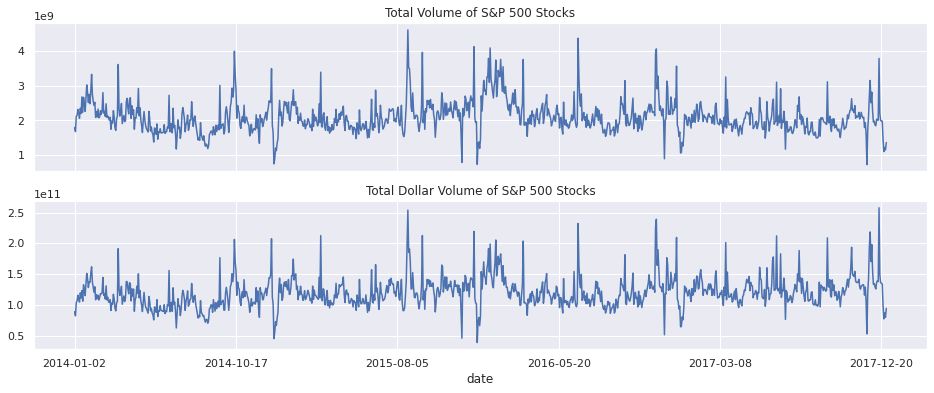

In [4]:
stocks['dvolume'] = stocks['close'] * stocks['volume']

fig, ax = plt.subplots(2,sharex=True, figsize=(16,6))
stocks.groupby('date')['volume'].sum().plot(ax=ax[0])
ax[0].set_title('Total Volume of S&P 500 Stocks')
stocks.groupby('date')['dvolume'].sum().plot(ax=ax[1])
ax[1].set_title('Total Dollar Volume of S&P 500 Stocks');

### Volume distribution of popoular stocks 

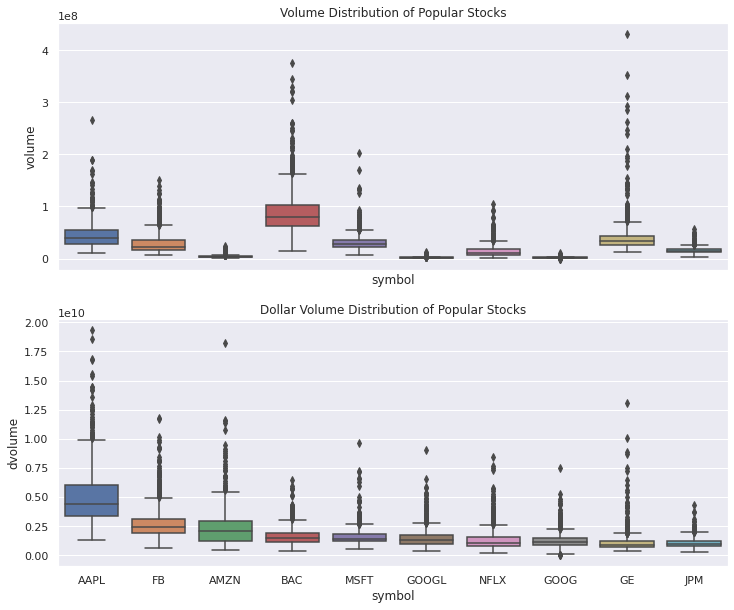

In [6]:
pop_stocks = stocks.groupby('symbol')['dvolume'].mean().sort_values(
    ascending=False).head(10).index.to_list()

fig, ax = plt.subplots(2,sharex=True,figsize=(12,10))
sns.boxplot(x='symbol', y='volume', data=stocks, order=pop_stocks, ax=ax[0])
ax[0].set_title('Volume Distribution of Popular Stocks')
sns.boxplot(x='symbol', y='dvolume', data=stocks, order=pop_stocks, ax=ax[1])
ax[1].set_title('Dollar Volume Distribution of Popular Stocks');

### Volatile Stocks vs. Popular Stocks 

In [7]:
# daily return
ror0 = stocks.sort_values(['symbol','date']).drop(['open','high','low','volume','dvolume'], axis=1)
ror0['return'] = ror0['close'].pct_change()

# drop first row of each stock
ror = ror0[ror0['symbol']==ror0['symbol'].shift()]

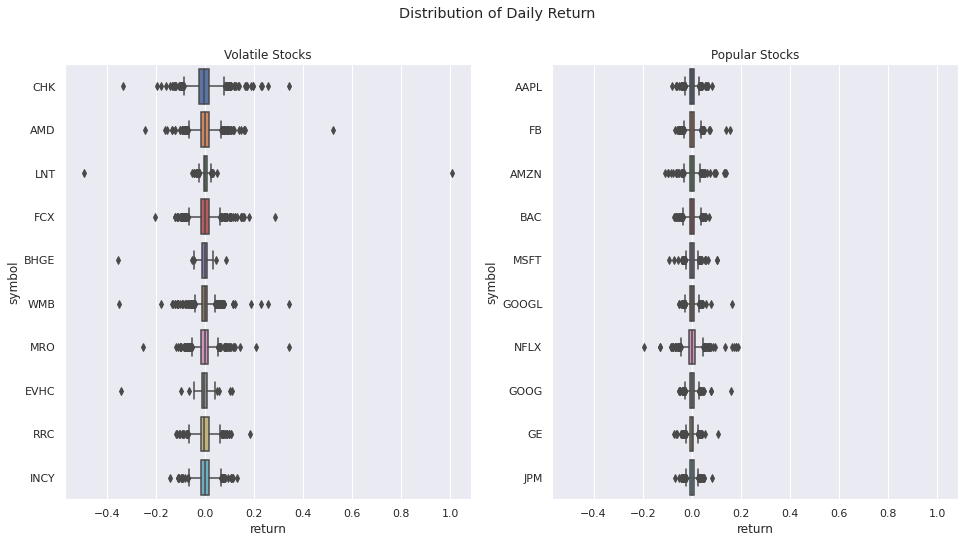

In [8]:
high_vola = ror.groupby('symbol')['return'].std().sort_values(
    ascending=False)[:10].index.to_list()

fig, ax= plt.subplots(1,2,sharex=True,figsize=(16,8))
plt.suptitle('Distribution of Daily Return')
sns.boxplot(y='symbol', x='return', data=ror, order=high_vola, orient='h', ax=ax[0])
ax[0].set_title('Volatile Stocks')
sns.boxplot(y='symbol', x='return', data=ror, order=pop_stocks, orient='h', ax=ax[1])
ax[1].set_title('Popular Stocks');

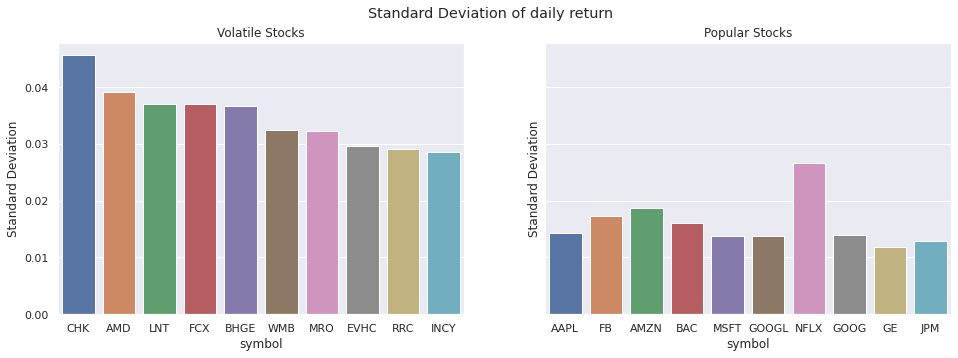

In [9]:
vola_df = pd.DataFrame(ror.groupby('symbol')['return'].std())

fig, ax = plt.subplots(1,2,sharey=True,figsize=(16,5))
plt.suptitle('Standard Deviation of daily return')
sns.barplot(x=vola_df.index, y=vola_df['return'], ax=ax[0], order=high_vola)
ax[0].set_title('Volatile Stocks')
ax[0].set_ylabel('Standard Deviation')
sns.barplot(x=vola_df.index, y=vola_df['return'], ax=ax[1], order=pop_stocks)
ax[1].set_title('Popular Stocks')
ax[1].set_ylabel('Standard Deviation');

### Winner Stocks and Loser Stocks 

In [10]:
price_df = stocks.pivot(index='date',columns='symbol',values='close').dropna(how='any',axis=1)

for i in tqdm(range(price_df.shape[1])):
    for j in range(len(price_df)-1, -1, -1):
        price_df.iat[j,i] = price_df.iat[j,i]/price_df.iat[0,i]

100%|██████████| 479/479 [00:34<00:00, 13.76it/s]


In [11]:
price_df

symbol,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2014-01-03,1.012631,1.046530,1.028613,0.978034,1.006156,1.000715,1.010725,1.003328,0.997807,1.006696,...,0.98592,0.992386,0.997594,1.004796,1.006717,1.009075,1.006259,1.004337,1.007083,0.990420
2014-01-06,1.007650,1.065852,1.018772,0.983367,0.969411,0.997138,1.024065,0.992728,0.980266,1.001015,...,0.97184,0.988036,0.999098,0.998749,1.015113,1.007319,1.005460,1.010841,1.000000,0.988257
2014-01-07,1.022060,1.060923,1.031347,0.976330,0.971335,1.008013,1.016218,1.004807,0.994603,1.006291,...,0.97184,0.990211,1.013233,1.014178,1.023510,1.010246,1.019577,1.031006,1.003035,0.991965
2014-01-08,1.038783,1.089511,1.023328,0.982518,0.968834,1.017885,1.025373,1.012572,0.993422,1.008726,...,0.97248,0.998695,1.009925,1.016055,1.014274,1.009660,1.019177,1.056266,1.011804,0.980841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,1.198185,2.073738,0.916257,2.214798,1.889381,1.322936,1.489145,1.896832,2.951594,1.802963,...,1.12544,1.477485,0.841805,1.372394,0.620907,1.978337,1.097350,1.302255,1.731197,2.224660
2017-12-26,1.196406,2.083991,0.929105,2.158608,1.880531,1.334240,1.490976,1.885739,2.942149,1.798498,...,1.12768,1.470524,0.841905,1.381568,0.617338,1.975995,1.094553,1.300520,1.715346,2.235476
2017-12-27,1.197296,2.066246,0.909149,2.158988,1.887072,1.324939,1.503270,1.889806,2.957666,1.808036,...,1.12640,1.477268,0.841103,1.376772,0.618808,1.997365,1.097350,1.302472,1.710287,2.238875


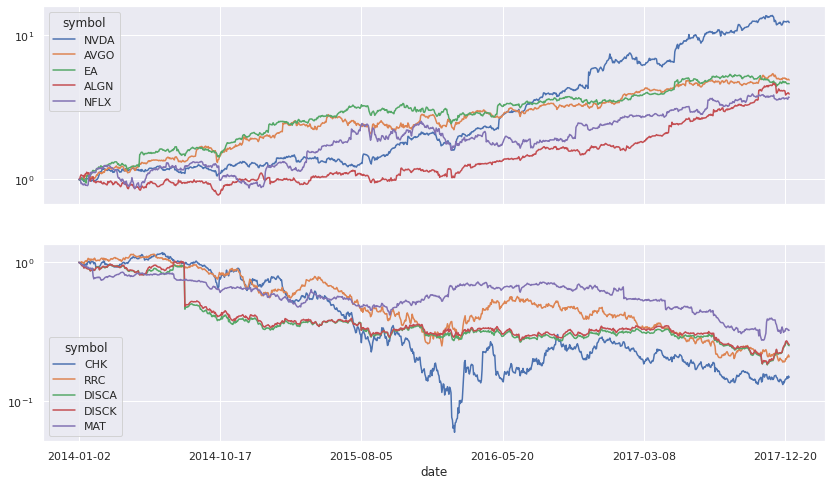

In [19]:
winners = price_df.T.sort_values('2017-12-29', ascending=False)[:5].index
losers = price_df.T.sort_values('2017-12-29')[:5].index

fig,ax = plt.subplots(2,sharex=True,figsize=(14,8))
price_df[winners].plot(ax=ax[0])
ax[0].set_yscale('log')
price_df[losers].plot(ax=ax[1])
ax[1].set_yscale('log');

DISCA and DISCK are rather less-volatiles stocks, but they once expeienced sharp price decline. There might be stock split.